<a href="https://colab.research.google.com/github/nseudondian/Auto-message-with-python/blob/master/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [9]:
# Check the shape of the dataset
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [10]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [11]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [12]:
# Summary of the statistics of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated?

In [75]:
# Calculating the orders that are not rated
df['rating'].value_counts()


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
The number of orders not rated is 736.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

**Order ID**

In [14]:
# Check unique order ID
df['order_id'].nunique()

1898

**Customer ID**


In [15]:
# Check unique customer ID
df['customer_id'].nunique()

1200

**Restaurant Name**

In [16]:
# Check unique Restaurant Name
df['restaurant_name'].nunique()

178

**Cuisine Type**

In [17]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

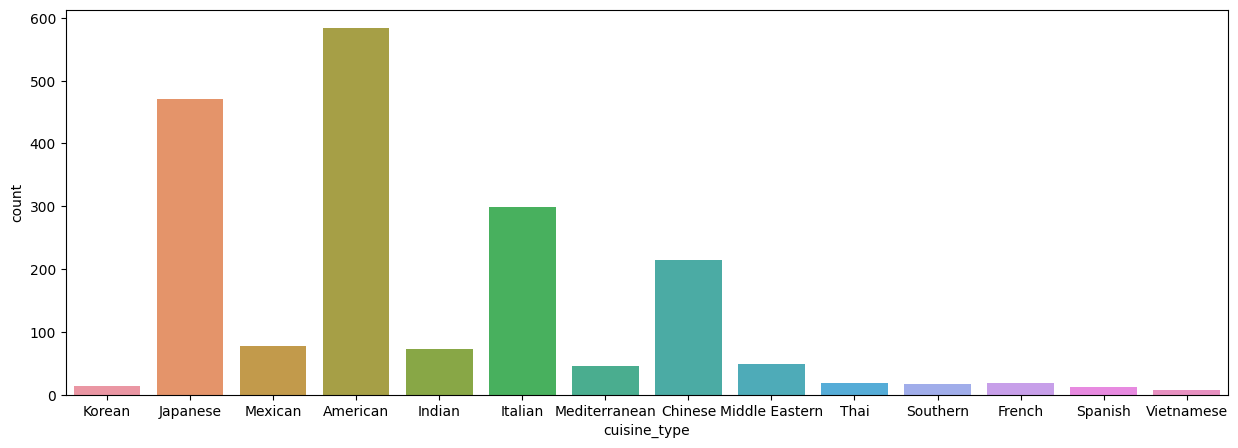

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'cuisine_type')

**Cost of the order**

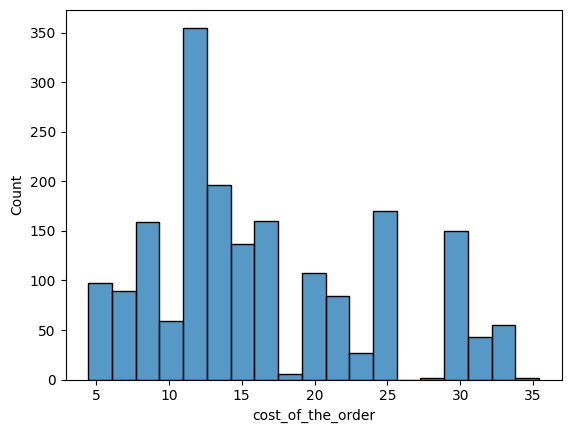

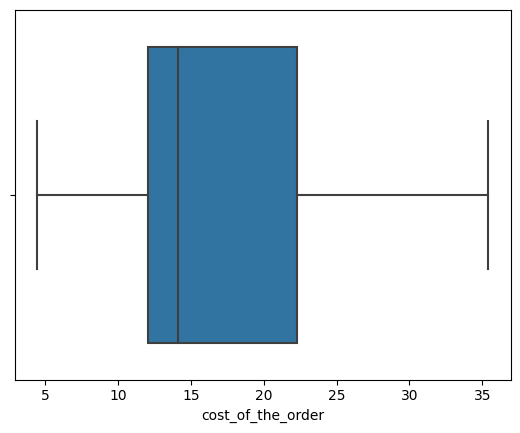

In [21]:
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

**Day of the week**

In [22]:
# Check the unique values to determine the days of the week
df['day_of_the_week'].nunique()

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

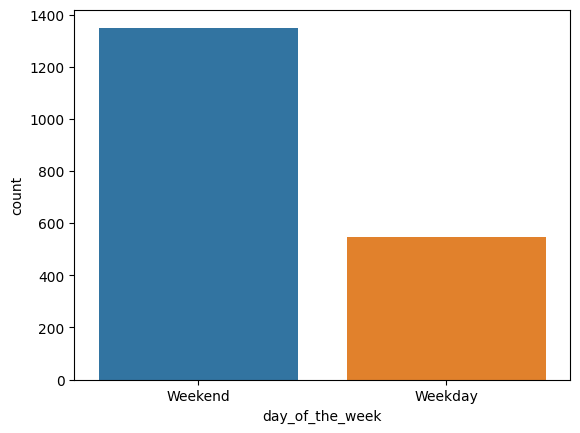

In [23]:
sns.countplot(data=df, x = 'day_of_the_week')

**Rating**

In [24]:
 # Check the unique values to determine the rating values
df['rating'].nunique()

4

<Axes: xlabel='rating', ylabel='count'>

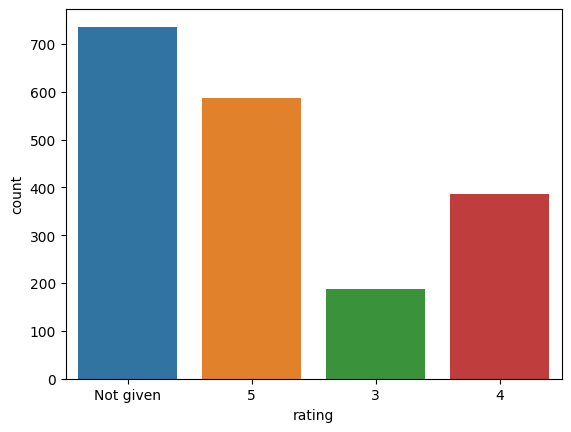

In [25]:
sns.countplot(data = df, x = 'rating')

**Food Preparation time**

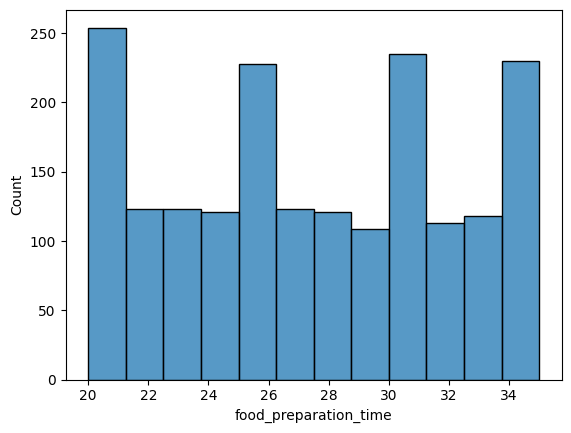

<Axes: xlabel='food_preparation_time'>

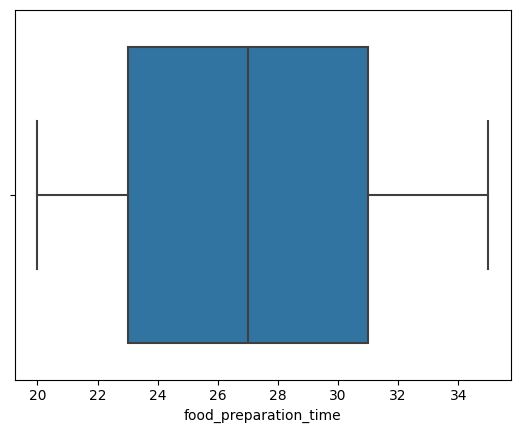

In [26]:
sns.histplot(data=df, x='food_preparation_time')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')

**Delivery time**

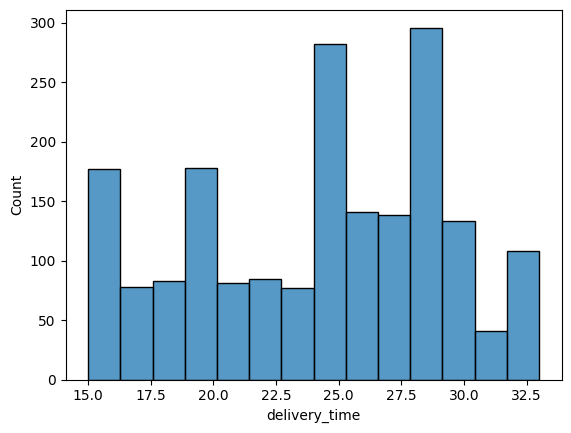

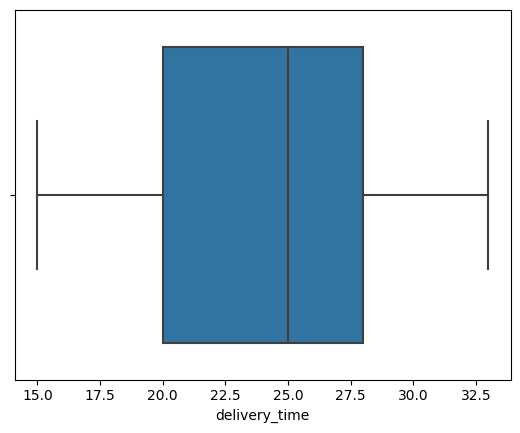

In [27]:
sns.histplot(data=df, x='delivery_time')
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [28]:
# top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:


The top 5 restaurants in terms of orders received are:
1. Shake Shack with 219 orders
2. The Meatball Shop with 132 orders
3. The Ribbon Sushi with 119 orders
4. Blue Ribbon Fried Chicken wirh 96 orders
5. Parm with 68 orders


### **Question 8**: Which is the most popular cuisine on weekends?

In [38]:
# Most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()



American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [41]:
most_popular_on_weekends = df_weekend['cuisine_type'].value_counts().idxmax()
print("Most popular cuisine on weekends is", most_popular_on_weekends)

Most popular cuisine on weekends is American


#### Observations:


American is the most popular cuisine on weekends. It has a count_value of 415

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [40]:
# Orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20)

# Percentage of orders greater than 20 dollars
percentage =(df_greater_than_20.shape[0]/df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is:       order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
3      1477334       106968              Blue Ribbon Fried Chicken   
5      1477224       147468                       Tamarind TriBeCa   
12     1476966       129969              Blue Ribbon Fried Chicken   
17     1477373       139885              Blue Ribbon Sushi Izakaya   
...        ...          ...                                    ...   
1884   1477437       304993                            Shake Shack   
1885   1477550        97324                            Shake Shack   
1892   1477473        97838                            Han Dynasty   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1895   1477819        35309                      Blue Ribbon Sushi   

     cuisine_type  cost_of_the_order day_of_the_week     rating  \
0          Korean              30.

#### Observations:


Percentage of orders above 20% is 29.24%

### **Question 10**: What is the mean order delivery time?

In [42]:
# Mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delviery time is', round(mean_del_time, 2), 'minutes')

The mean delviery time is 24.16 minutes


#### Observations:


The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [43]:
# Top 3 most frequent customers
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


The customers that qualify for 20% discount vouchers are customers with the following customer_id:
1. 52832
2. 47440
3. 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

**Cuisine vs Cost of the order**

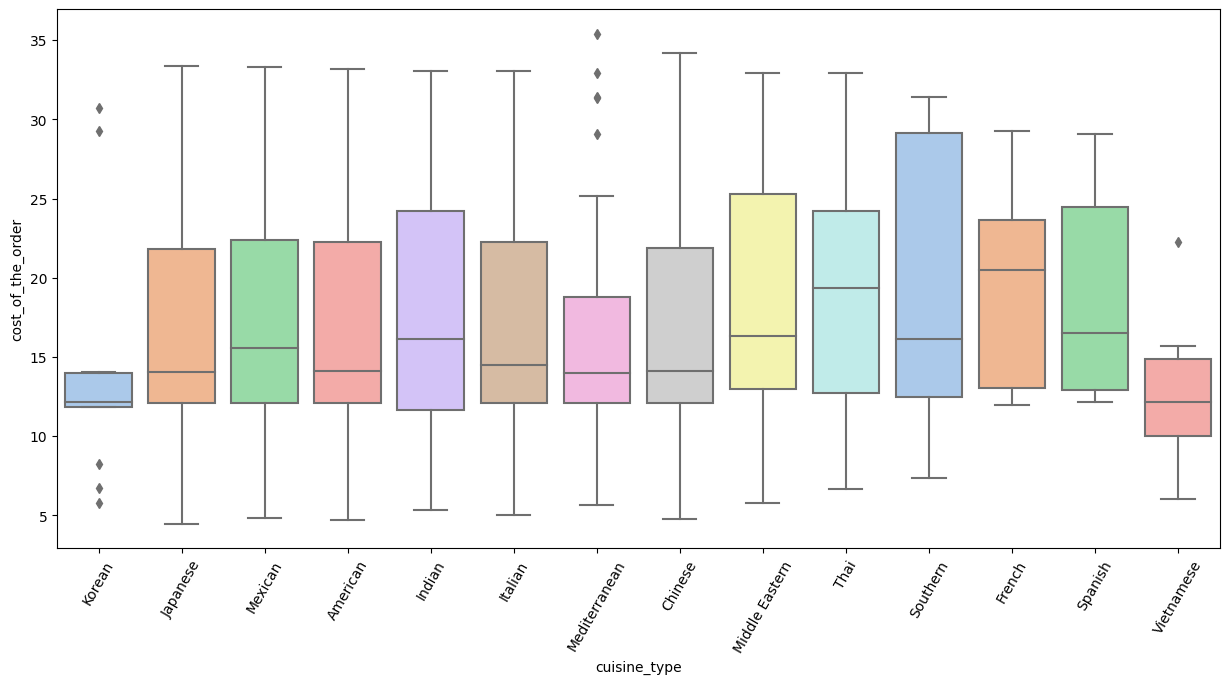

In [47]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y = 'cost_of_the_order', data=df, palette='pastel')
plt.xticks(rotation = 60)
plt.show()

**Cuisine vs Food Preparation time**

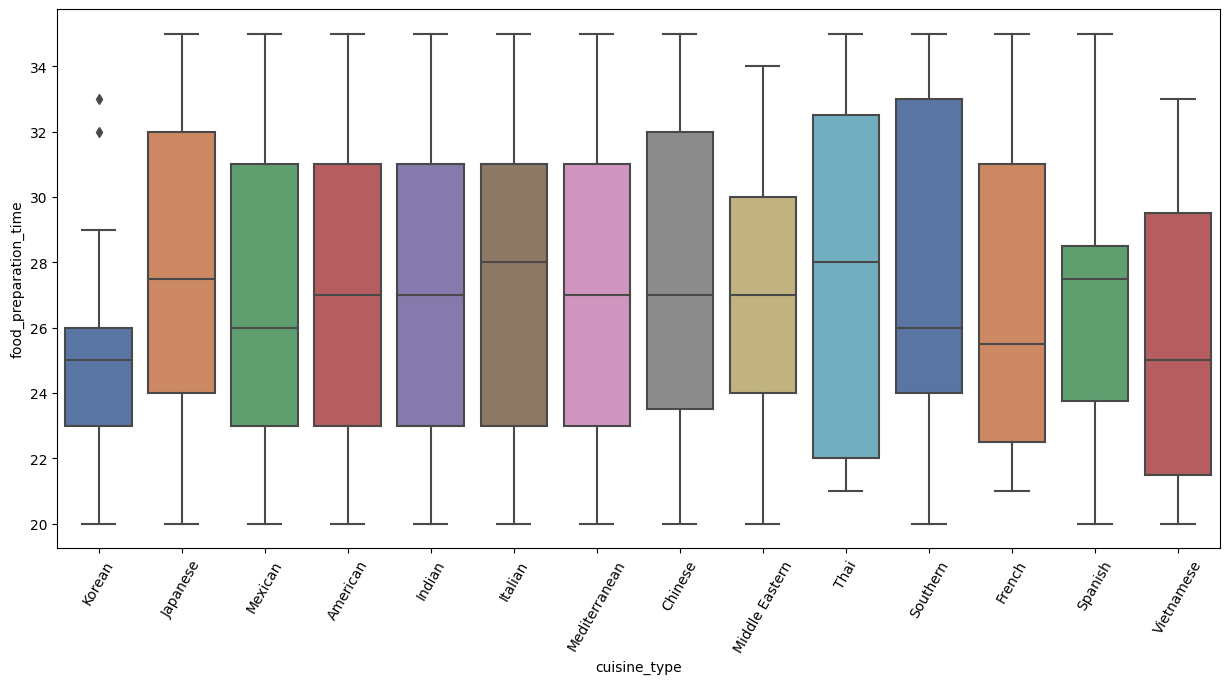

In [48]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x= 'cuisine_type', y='food_preparation_time', data=df, palette='deep')
plt.xticks(rotation=60)
plt.show()

**Day of the Week vs Delivery Time**


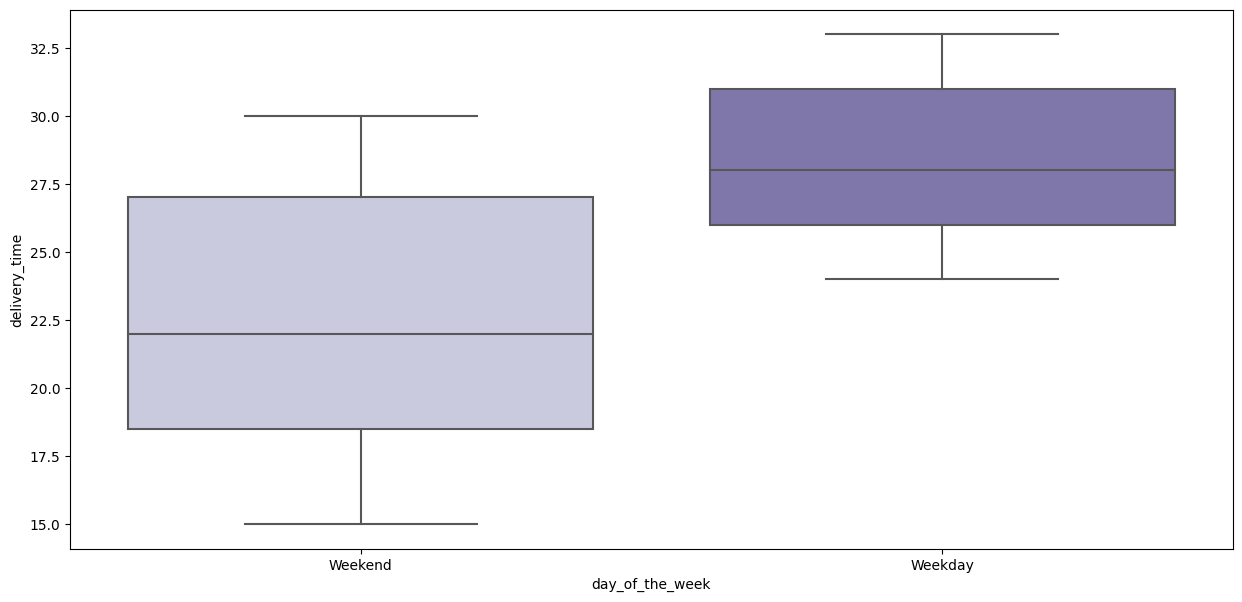

In [49]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, palette = 'Purples')
plt.show()

**Revenue Generated by the Restaurants**

In [51]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

**Observation**

The highest revenue is generated by 'Shake Shack' restaurant. The value is $3579.53.

The lowest revenue is generated by 'Five Guys Burgers and Fries' restaurant. The value is $506.47

**Rating vs Delivery time**

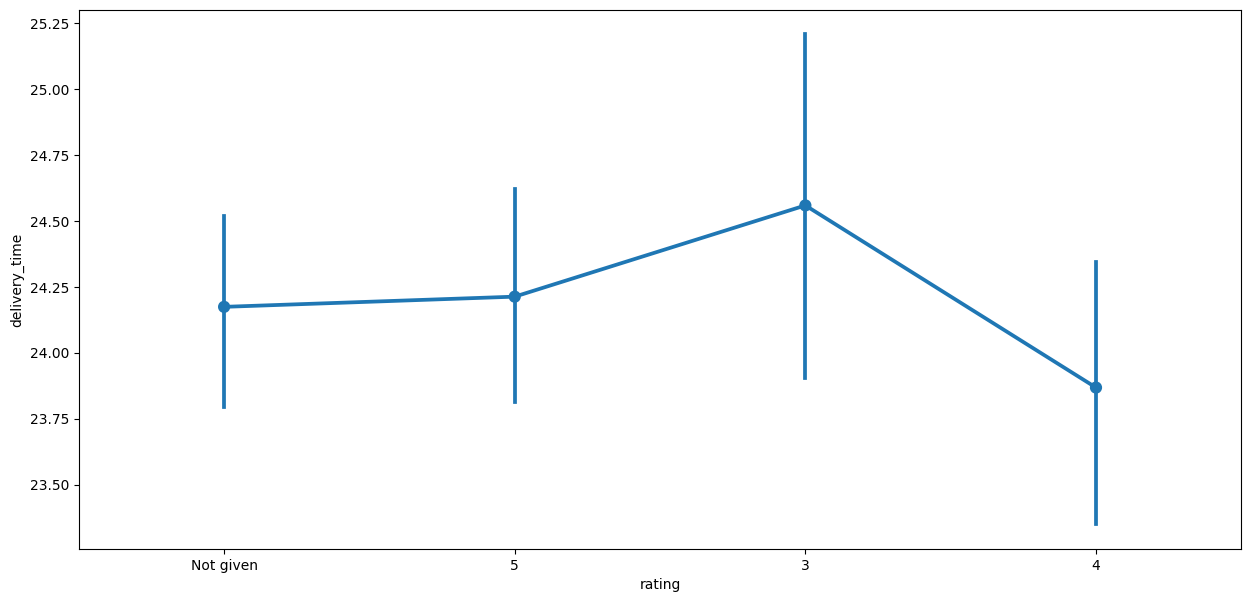

In [52]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

**Rating vs Food Preparation time**

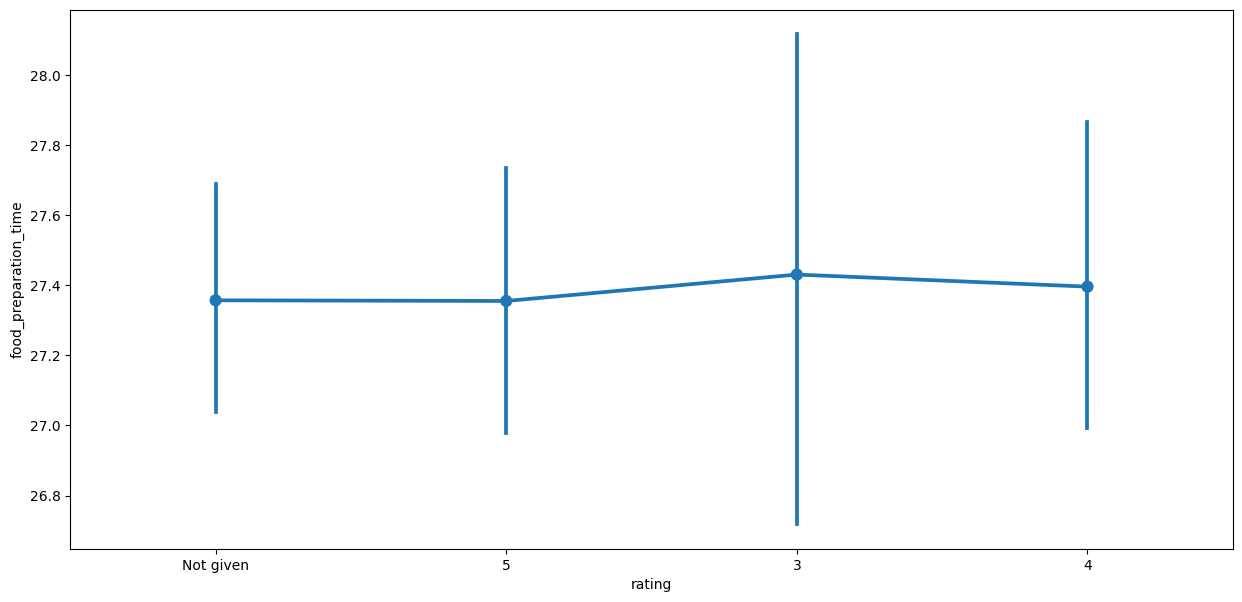

In [53]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15,7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

**Rating vs Cost of the order**

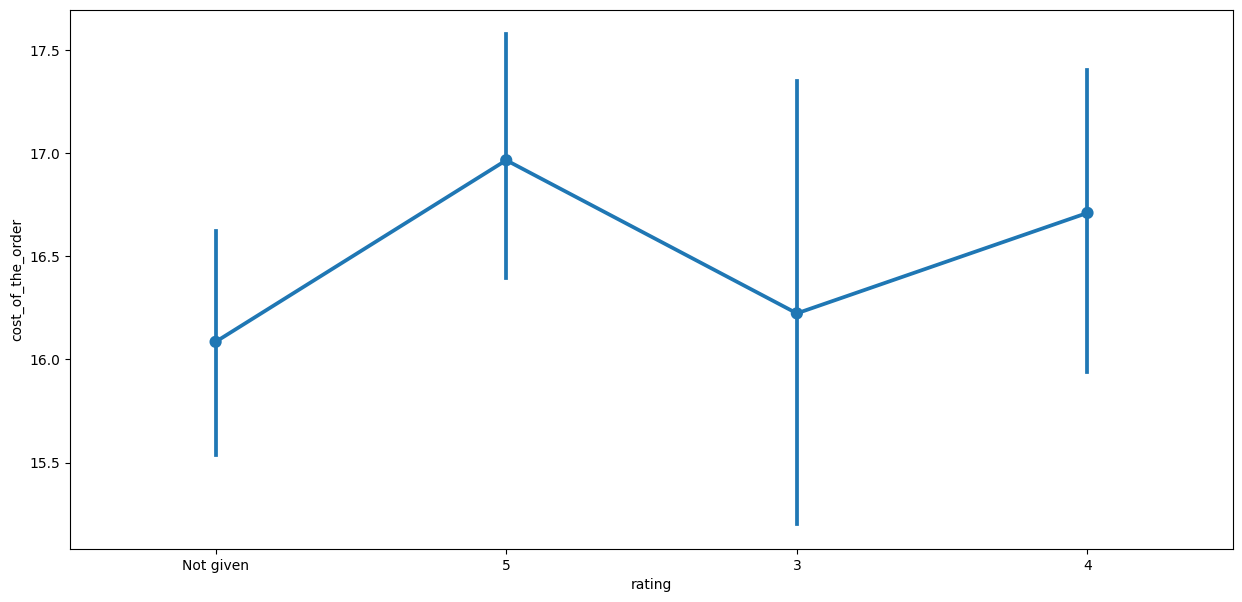

In [54]:
# Relationship between rating and cost of the order
plt.figure(figsize = (15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

**Correlation among variables**

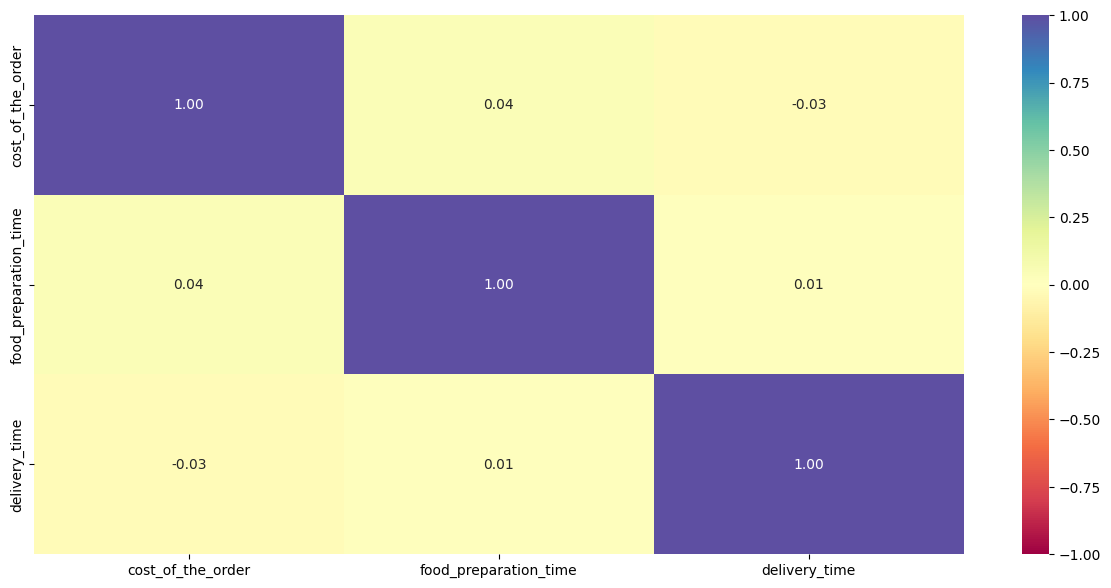

In [55]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15,7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [57]:
# Restaurants fulfilling the criteria to get the promotional offer
# Filtering the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Converting rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

#Creating a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [66]:
# Restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filtering to get the data of restaurants that have rating more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Grouping the restaurant names with their ratings and finding the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
Based on the conditions (rating count of more than 50, average rating greater than 4), 4 restaurants fulfil the criteria to get the promotional offer. They are:

1. The Meatball Shop
2. Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [69]:
# Determining the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,1.7385


In [70]:
# Total Revenue
total_rev = df["Revenue"].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
The net revenue is around 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [71]:
# Calculating the total delivery time and adding a new column to the dataframe to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Percentage of orders that have more than 60 minutes of total delivery time
total_orders = len(df)
orders_more_than_60_minutes = len(df[df['total_time'] > 60])

percentage_orders_more_than_60_minutes = (orders_more_than_60_minutes / total_orders) * 100

print(f"Percentage of orders with more than 60 minutes of total delivery time: {percentage_orders_more_than_60_minutes:.2f}%")

Percentage of orders with more than 60 minutes of total delivery time: 10.54%


#### Observations:
Percentage of orders with more than 60 minutes of total delivery time: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [74]:
# Mean Delivery time on weekdays
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] != 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
The mean delivery time on weekdays is greater than the mean delivery time on weekends by a difference of 6 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  The cuisine type with the most count is American
The following restaurants have ratings greater than 4:
1. The Meatball Shop	4.511905
2.	Blue Ribbon Fried Chicken	4.328125
3.	Shake Shack	4.278195
4.	Blue Ribbon Sushi	4.219178

### Recommendations:

*  American cuisine has the most demand. Restaurants should always figure it in.
The Company should priotize the four restaurants with ratings higher than 4:
1. The Meatball Shop
2. Blue Ribbon Fried Chicken
3. Shake Shack	4.278195
4. Blue Ribbon Sushi

---